# Correspondence Analysis with Diodon - a tutorial

This is an elementary tutorial for basic Correspondence Analysis with Diodon.

## Overview

The tutorial programm for running CoA is very short, and given here. It will be explained step by step along this notebok.


```Python  

# importing library
import pydiodon as dio 

# loading dataset
A, rownames, colnames = dio.load_dataset("example_coa")

# running CoA
L, Y_r, Y_c = dio.coa(A)

```
It is followed by a few functions for plotting the results

```Python

# plotting the results
dio.plot_coa(Y_r, Y_c, rownames=rownames, colnames=colnames)

```


## Importing python version of diodon

In [1]:
import pydiodon as dio

loading pydiodon - version 23.01.28


## Loading dataset

Use therefore the function `dio.load_dataset()`.  

There are two datasets

The name for the example for CoA is "example_coa". It is a small dataset with 10 categories on rows and 8 on columns. 

In [2]:
coa_datasets = ["example_coa","ade4_doubs_fish"]

Give here the index of the file name for CoA (between 1 and $n$)

In [3]:
index = 2
dataset = coa_datasets[index-1]

In [4]:
A, rownames, colnames = dio.load_dataset(dataset)

dataset ade4_doubs_fish loaded, with 30 rows and 27 columns.


## Analyzing dataset

Correspondence Analysis is done with one single command, `coa()`. 


### Method

There are various ways to present CoA. Here, we have selected CoA as PCA on a contingency table with 
specific metrics on rows and columns. Let
$$
A = (a_{ij})_{i,j} \qquad 1 \leq i \leq n, \quad 1 \leq j \leq p 
$$
be a contingency table (hence $a_{ij} \in \mathbf{N}$). The row and column margins are defined as
$$
a_{i+} = \sum_j \, a_{ij}, \qquad a'_{+j} = \sum_i \, a_{ij}
$$
Then, the matrix $C$ is defined with
$$
C_{ij} = \frac{a_{ij}- a_{i+}a'_{+j}}{\sqrt{a_{i+} \, a'_{+j}}}
$$
CoA of $A$ is defined as the PCA (without centering nor scaling) of $C$. The row components $Y_r$ of CoA of $A$ are the principal components of $C^T$ and the column components $Y_c$ of CoA of $A$ are the principal components of $C$. 

### Arguments

It has five arguments:

- $A$, the contingency table to analysed; there is no default value ; dimensions are $n x p$
- $k$, and integer: the number of axis to compute ; default value is $k=-1$, which means a computation of all axis
- meth, a string: the method to compute row and column components; default value is `svd`; 

Those are standard choices. Next are two arguments for optimizing the numerical calculations, according to the size of the contingency table:  
- `transpose=False`: if $n < p$, it is advised to transpose the matrix before its analysis; this is done by setting `transpose=True`.
- `withloops=False`: whether loops are implemented or not for the pretratment of the matrix.

### Call 


The call is

In [5]:
L, Y_r, Y_c = dio.coa(A, k=3)

[0.00298507 0.0119403  0.0159204  0.02089552 0.03383084 0.02089552
 0.0159204  0.00099502 0.01393035 0.01393035 0.01094527 0.01791045
 0.01890547 0.0278607  0.03283582 0.03980099 0.04378109 0.04179104
 0.04577114 0.05572139 0.06169154 0.07164179 0.0039801  0.01492537
 0.01094527 0.04278607 0.06268657 0.06965175 0.08656716 0.08855721]


### Outputs

CoA() return three arrays: 

- $L$, a 1D numpy array, the set of sorted eigenvalues of $C^T \,C$, or squares of singular values of $C$
- $Y_r$, a $n \times k$ 2D numpy array, the sets of row principal components of CoA of $A$
- $Y_c$, a $p \times k$ 2D numpy array, the sets of columns principal components of CoA of $A$


### Plotting the results

One "raison d'être" of Correspondence Analysis is to establish a correspondence between the point cloud of row components ($n$ points in $\mathbf{R}^k$) and of column components ($p$ points in $\mathbf{R}^k$). This allows to plot both point clouds simultaneously on the same plot, which is done by a call to function `plot_coa()`.

plotting axis 1 and 2 ...


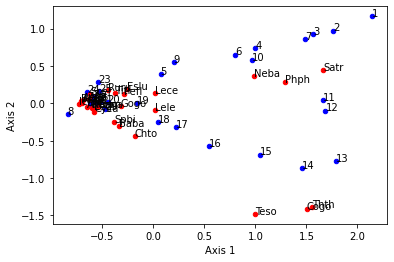

In [6]:
dio.plot_coa(Y_r, Y_c, rownames=rownames, colnames=colnames)

### Eigenvalues

Eigenvalues are given in $L$, and are 

In [7]:
print(L)

[0.6012659  0.14438437 0.10837588]


## References

#### For CoA:

- L. Lebart, A. Morineau, and N. Tabard. Techniques de la description statistique. Bordas - Dunod, 1977.
- L. Lebart, A. Morineau, and J.-P. Fénelon. Traitement des données statistiques. Dunod, Paris, 1982.
- L. Lebart, A. Morineau, and M. Piron. Statistique exploratoire multidimensionnelle. Dunod, Paris, 2000
- M. Greenacre. Theory and Applications of Correspondence Analysis. Academic Press, 1984.
- O. Nenadić and M. Greenacre. Correspondence Analysis in R, with Two- and Three-dimensional Graphics: The ca Package. Journal of Statistical Software, 20(3):1–12, 2007.

#### For dataset:
Table 8, p. 306, in L. Lebart, A. Morineau, and J.-P. Fénelon (1982).


### Authors 
Alain Franc      
Jean-Marc Frigerio

### Contributors

Olivier Coulaud   
Rémy Peressoni   
Florent Pruvost  

### Contact and maintainer 

Alain Franc, alain.franc@inrae.fr

### Version
started: October, 29th, 2022
version: 23.03.10

### Useful companions 

to run this notebook are:

**why it works:** the presentation of the methods from a linear algebra viewpoint, available at https://arxiv.org/abs/2209.13597   
**how it works:** the online documentation of pydiodon, available at https://diodon.gitlabpages.inria.fr/pydiodon